# NEW YORK AIRBNB : {DATA CLEANING}

<b>Description : </b>Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete
data within a dataset. Messy data leads to unreliable outcomes. Cleaning data is an essential
part of data analysis, and demonstrating your data cleaning skills is key to landing a job. Here
are some projects to test out your data cleaning skills.


<b>Key Concepts and Challenges:</b></br>
1.) Data Integrity: Ensuring the accuracy, consistency, and reliability of data throughout the
cleaning process.</br>
2.) Missing Data Handling: Dealing with missing values by either imputing them or making
informed decisions on how to handle gaps in the dataset.</br>
3.) Duplicate Removal: Identifying and eliminating duplicate records to maintain data
uniqueness.</br>
4.) Standardization: Consistent formatting and units across the dataset for accurate analysis.</br>
5.) Outlier Detection: Identifying and addressing outliers that may skew analysis or model
performance.</br>

### Import Libraries :

In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import metrics

## Read the Dataset :

In [414]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [415]:
data.shape

(48895, 16)

## Data Preprocessing :

In [416]:
## Checking for Missing Values :

data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [417]:
## Handling Null Values :

data['last_review'] = data['last_review'].fillna(data['last_review'].mode()[0])

data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

data['name'] = data['name'].fillna('Unknown')

data['host_name'] = data['host_name'].fillna('Unknown Host')

In [418]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [419]:
## Changing Datatypes :

data['last_review'] = pd.to_datetime(data['last_review'])

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [421]:
## Removing Duplicacy if any:

data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [422]:
data.nunique()

id                                48895
name                              47906
host_id                           37457
host_name                         11453
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### Drop unnecessary columns :

In [423]:
data.drop(['id','host_name','last_review','latitude','longitude'], axis=1, inplace=True)

In [424]:
data.head()

,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,Private room,149,1,9,0.210000,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,Private room,150,3,0,1.373221,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.100000,1,0


In [425]:
data.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Data Consistency :

In [426]:
data.describe()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [427]:
print(f"Average of price per night : ${data.price.mean():.2f}")
print(f"Maximum price per night : ${data.price.max()}")
print(f"Minimum price per night : ${data.price.min()}")

Average of price per night : $152.72
Maximum price per night : $10000
Minimum price per night : $0


### UNIQUE RECORDS IN SPECIFIC COLUMNS :

In [428]:
s = data['neighbourhood_group'].unique()
print('Distinct Neighbourood Group: ',s)

Distinct Neighbourood Group:  ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [429]:
v = data['room_type'].unique()
print('Distinct Room Type: ',v)

Distinct Room Type:  ['Private room' 'Entire home/apt' 'Shared room']


In [430]:
num = data['neighbourhood'].nunique()
print('Number Of Unique Neighbours: ',num)

Number Of Unique Neighbours:  221


### Data Visualisation :

In [431]:
cat_cols = data.dtypes[data.dtypes=='object'].index
num_cols = data.dtypes[data.dtypes!='object'].index
print('Cat_Cols => ', cat_cols)
print('Num_Cols => ', num_cols)

Cat_Cols =>  Index(['name', 'neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')
Num_Cols =>  Index(['host_id', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


##### CATEGORICAL COLUMNS VISUALISATION..

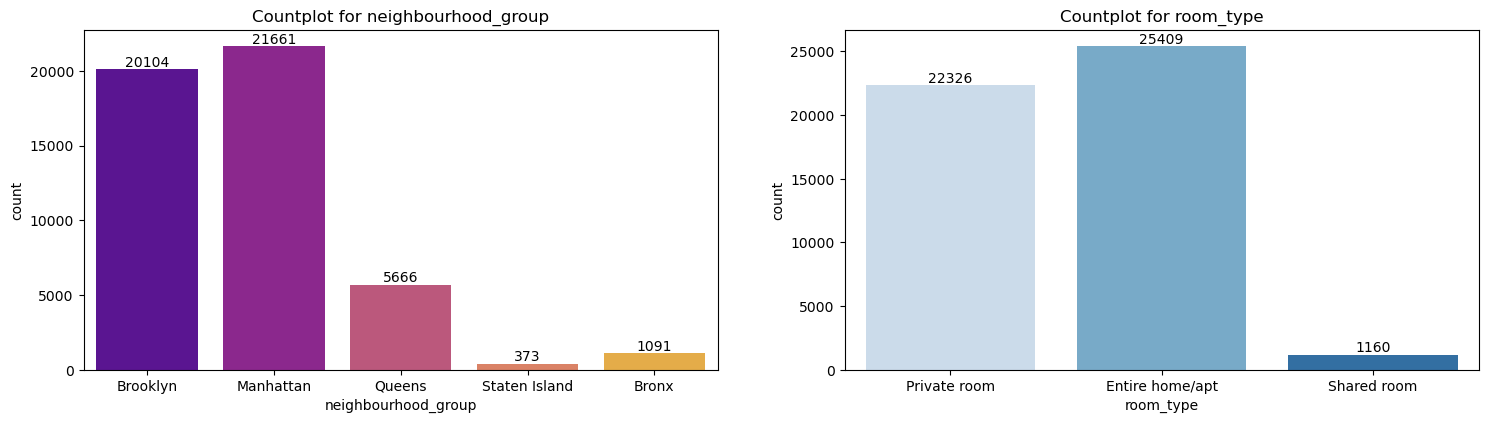

In [432]:
cat_cols = ['neighbourhood_group', 'room_type']
color_palettes = ['plasma', 'Blues']
plt.figure(figsize=(18,15))
for i in range(len(cat_cols)):  
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=data[cat_cols[i]], palette = color_palettes[i])
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

##### NUMERICAL COLUMNS VISUALISATION..

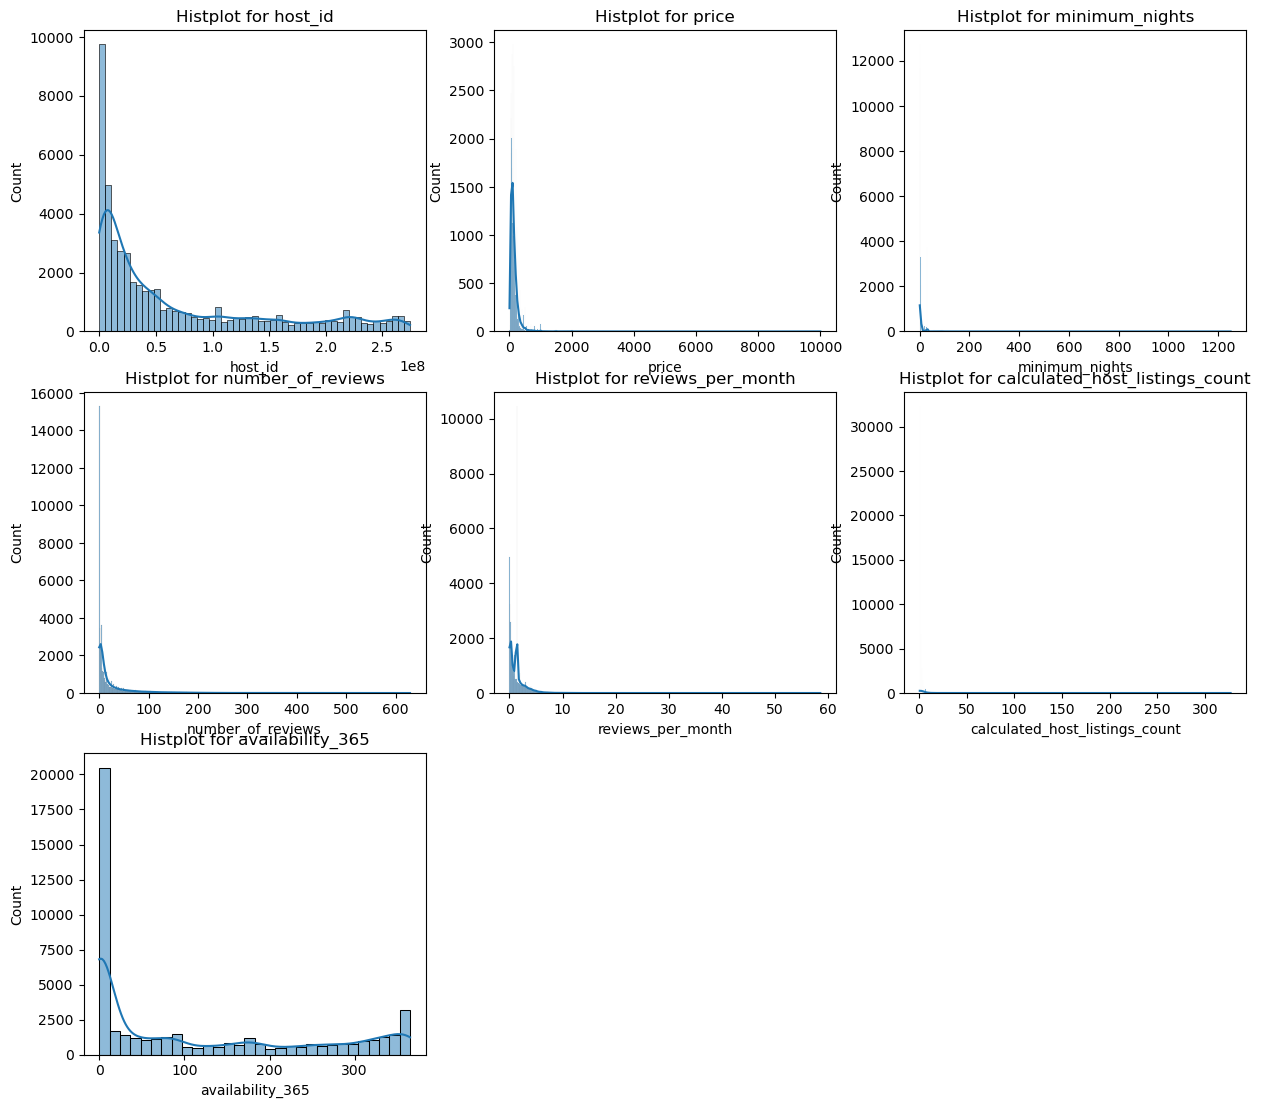

In [433]:
plt.figure(figsize=(15,18))
for i in range(len(num_cols)): 
    plt.subplot(4,3,i+1)
    sns.histplot(x=data[num_cols[i]],kde=True)
    plt.title(f'Histplot for {num_cols[i]}')
plt.show()

#### Most Popular Neighbourhood :

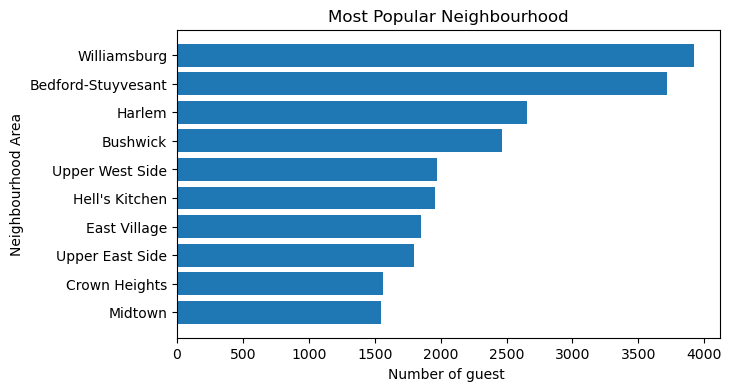

In [186]:
df = data.neighbourhood.value_counts()[:10]
plt.figure(figsize=(7, 4))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest ")
plt.barh(x, y)
plt.show()

### Average Minimum_Nights by Room_Type :

room_type
Entire home/apt    8.506907
Shared room        6.475000
Private room       5.377900
Name: minimum_nights, dtype: float64




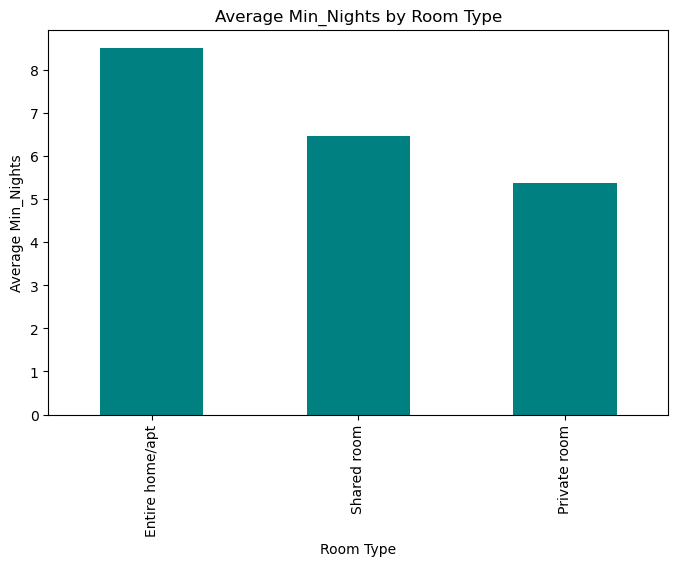

In [187]:
room_type_nights = data.groupby('room_type')['minimum_nights'].mean().sort_values(ascending=False)

print(room_type_nights)
print('\n')

plt.figure(figsize=(8,5))
room_type_nights.plot(kind='bar', color='teal')
plt.xlabel('Room Type')
plt.ylabel('Average Min_Nights')
plt.title('Average Min_Nights by Room Type')
plt.show()

### Average Price by Room_Type :

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64




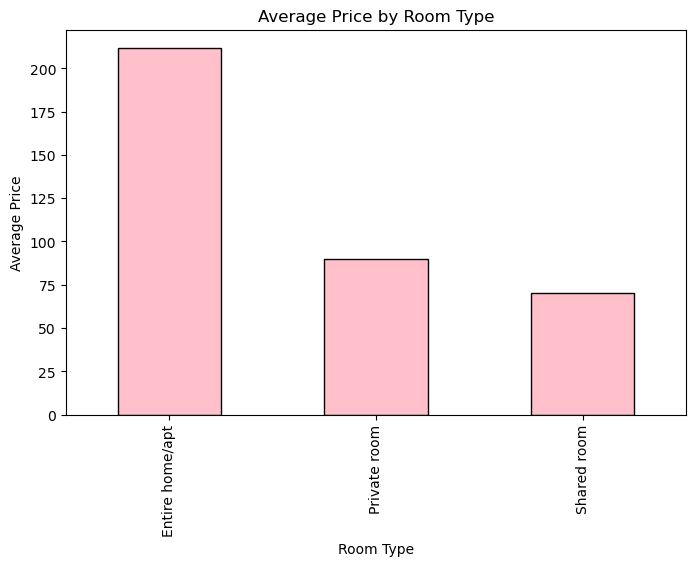

In [188]:
avg_price_by_room = data.groupby('room_type')['price'].mean().sort_values(ascending=False)

print(avg_price_by_room)
print('\n')

plt.figure(figsize=(8,5))
avg_price_by_room.plot(kind='bar', color='pink', edgecolor='black')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

#### Top 10 Host_Id :

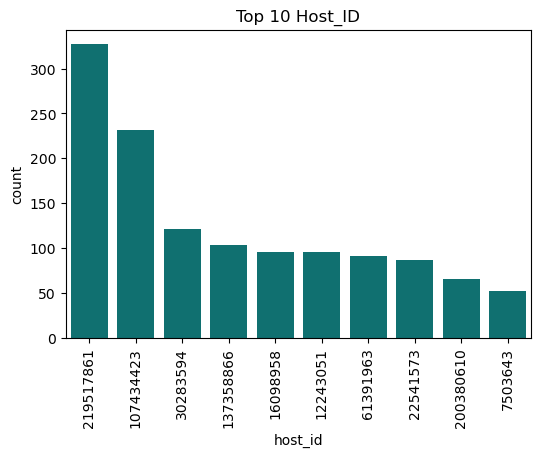

In [189]:
top_host = data.host_id.value_counts().head(10)

top_host_df = pd.DataFrame(top_host).reset_index()

top_host_df.columns = ['host_id', 'count']

top_host_df.sort_values(by='count', ascending=False, inplace=True)

plt.figure(figsize=(6,4))
ax = sns.barplot(x='host_id', y='count', data = top_host_df, color='teal', order=top_host_df['host_id'])
plt.title('Top 10 Host_ID')
plt.xticks(rotation=90)
plt.show()

#### Houses with Price = 0 or  No Price Charged for rent.

In [190]:
p0 = data[data.price == 0]
p0.head()

,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,0.05,4,28
25433,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Bronx,East Morrisania,Private room,0,2,55,2.56,4,127
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Brooklyn,Bushwick,Private room,0,2,16,0.71,5,0
25753,"Sunny, Quiet Room in Greenpoint",1641537,Brooklyn,Greenpoint,Private room,0,2,12,0.53,2,0
25778,Modern apartment in the heart of Williamsburg,10132166,Brooklyn,Williamsburg,Entire home/apt,0,5,3,0.15,1,73


In [191]:
data.describe()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Correlation Analysis :

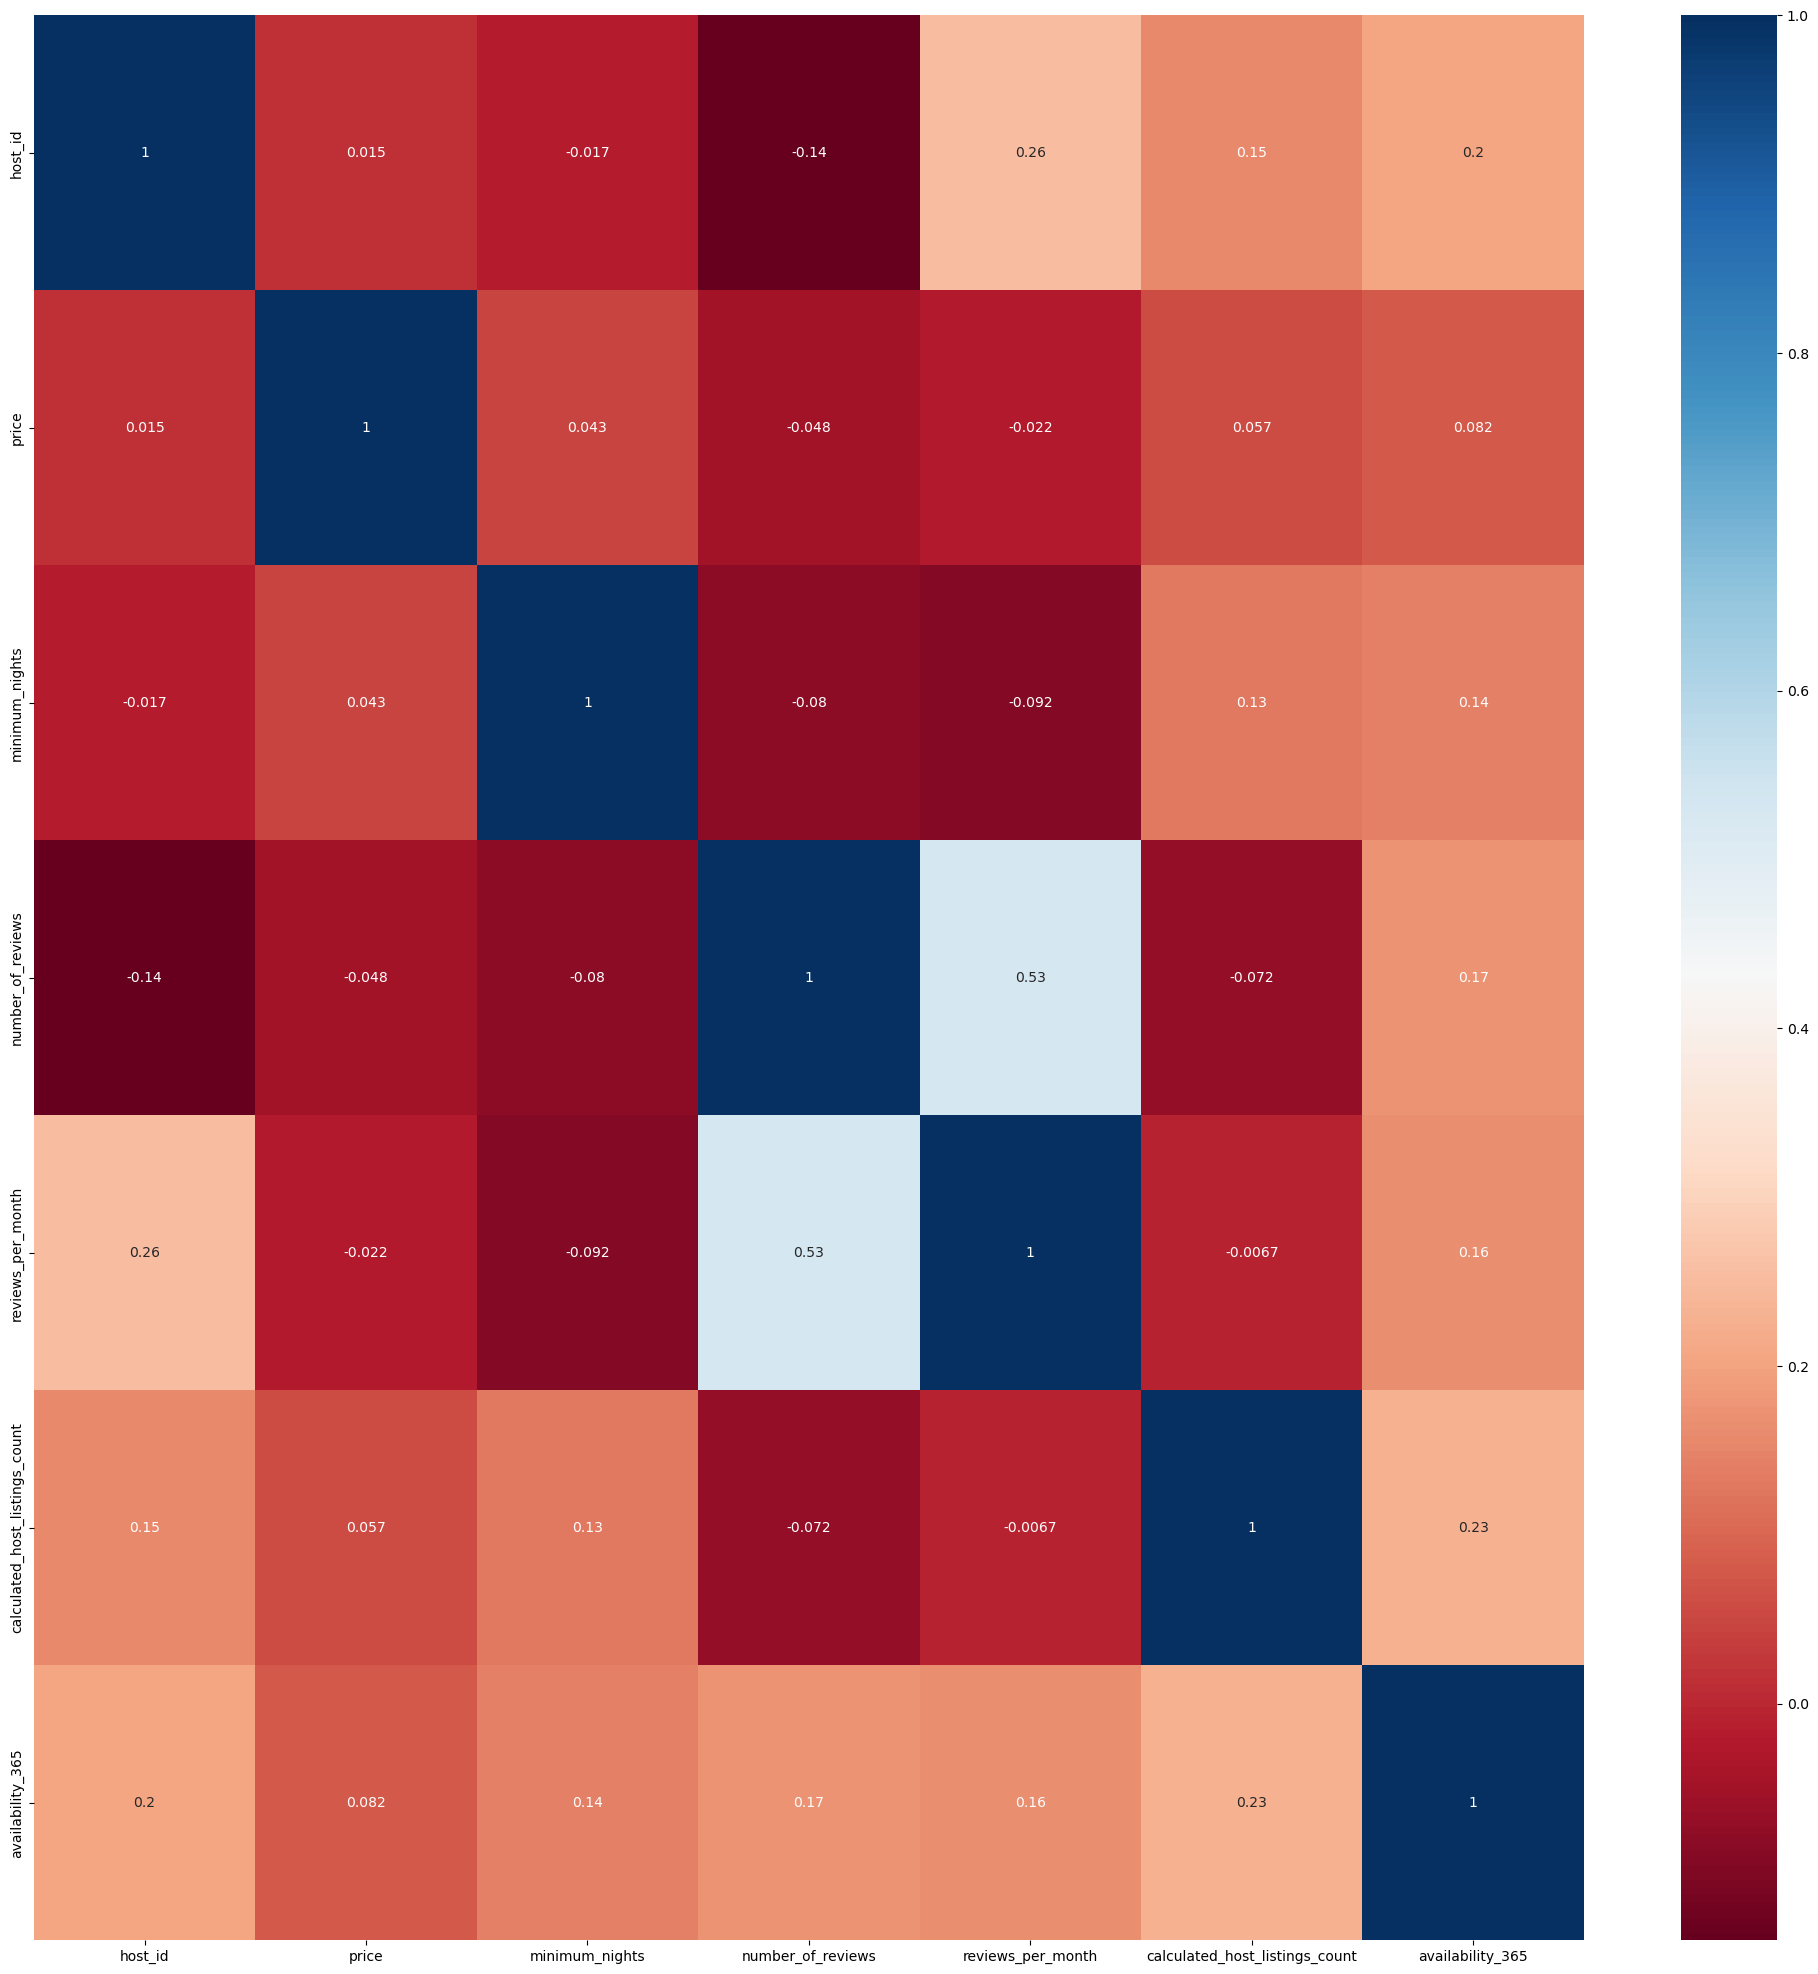

In [434]:
corr = data[num_cols].corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

### Standardisation :

In [541]:
from sklearn.preprocessing import StandardScaler

col_to_scale = ['host_id', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365']

s_sc = StandardScaler()
data[col_to_scale] = s_sc.fit_transform(data[col_to_scale])

### Outliers Detection & Removal :

In [542]:
num_cols_without_host_id = [col for col in num_cols if col != 'host_id']

unique_counts = data[num_cols_without_host_id].nunique()
print(unique_counts)

price                             674
minimum_nights                    109
number_of_reviews                 394
reviews_per_month                 938
calculated_host_listings_count     47
availability_365                  366
dtype: int64


In [543]:
proper_num_feat = [] 
for i in num_cols_without_host_id:
    if data[i].nunique()>15:
        proper_num_feat.append(i)

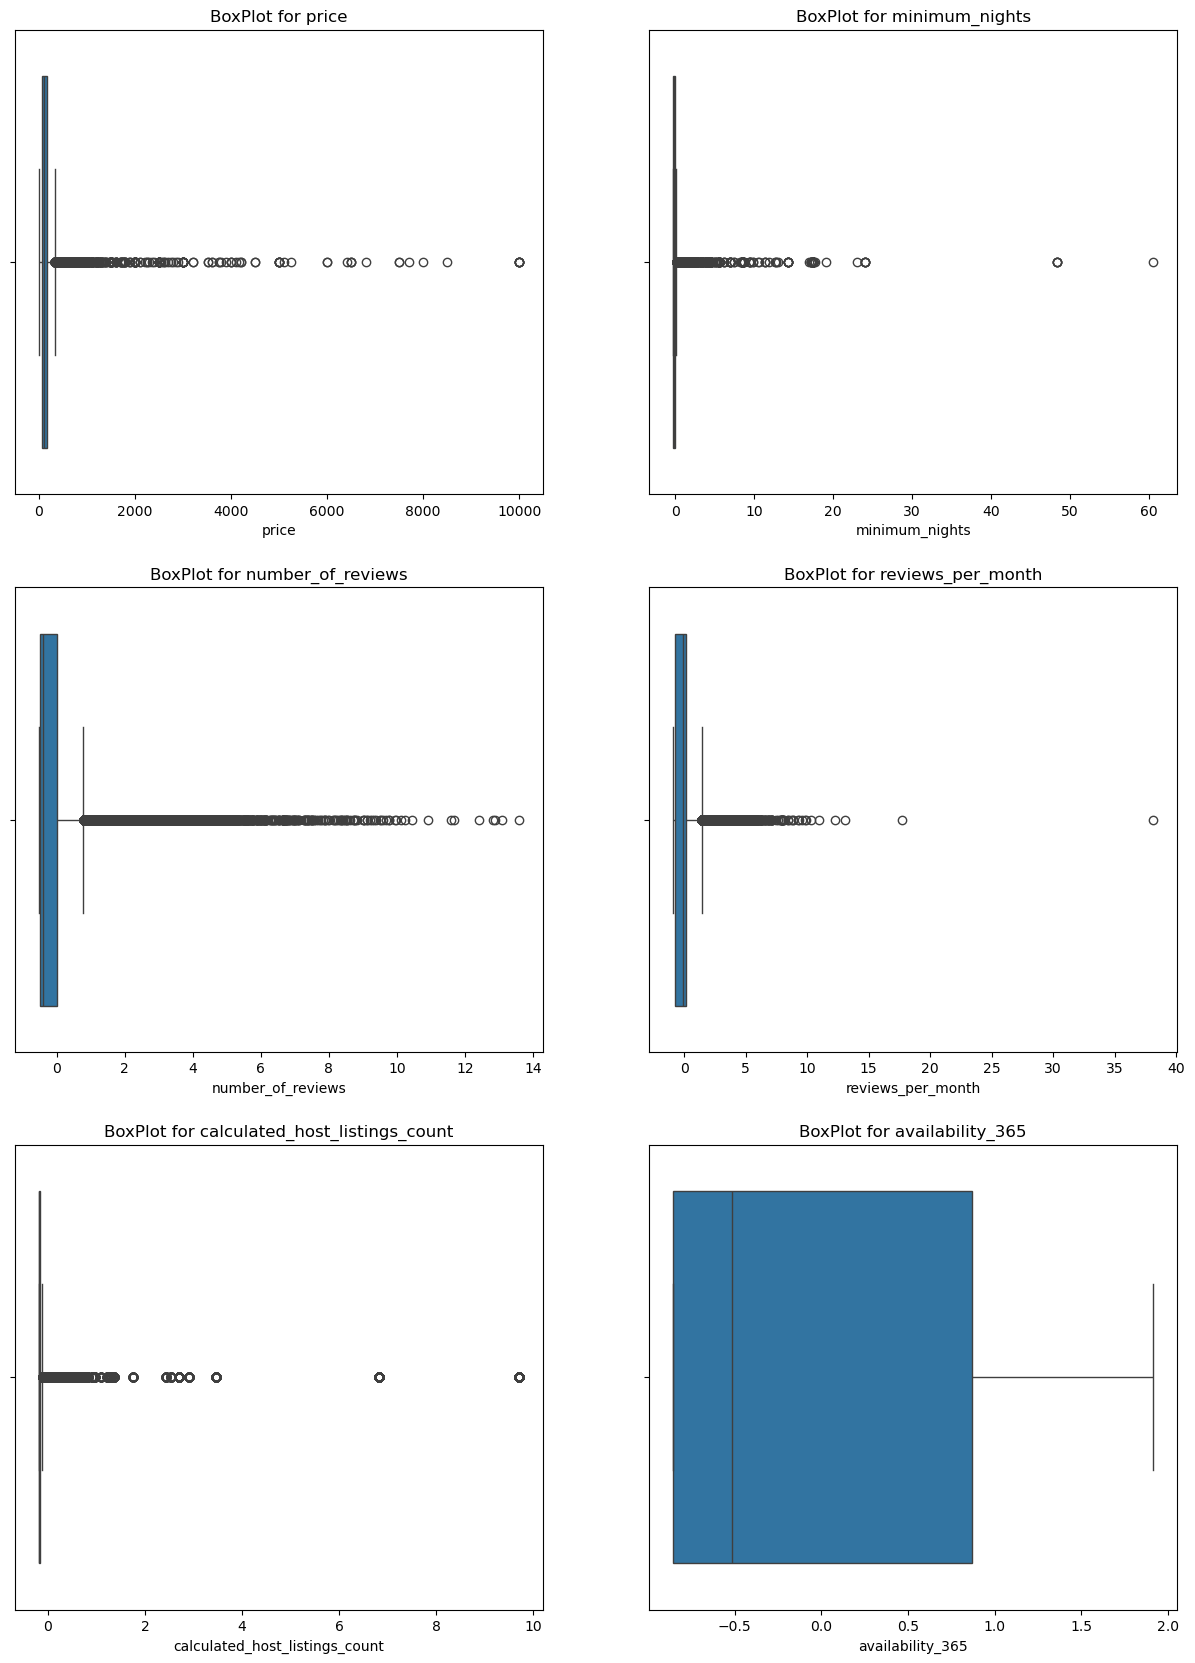

In [544]:
plt.figure(figsize=(15,35))
for i in range(len(proper_num_feat)):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=data[proper_num_feat[i]])
    plt.title(f'BoxPlot for {proper_num_feat[i]}')
plt.show()

In [545]:
## All the proper_numerical_features percentiles check..[:]                               ## UPPER END - 95% , LOWER END - 5%

a1 = data[proper_num_feat[:]].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T                 ## T - Transpose
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
price,0.000000,30.000000,35.000000,36.000000,40.000000,106.000000,355.000000,450.000000,550.000000,799.000000,10000.000000
minimum_nights,-0.293996,-0.293996,-0.293996,-0.293996,-0.293996,-0.196484,1.119925,1.119925,1.119925,1.851263,60.602118
number_of_reviews,-0.522433,-0.522433,-0.522433,-0.522433,-0.522433,-0.410200,2.036482,2.754774,3.338386,4.281145,13.596494
reviews_per_month,-0.910174,-0.903497,-0.896820,-0.896820,-0.883467,-0.102300,1.960781,2.422671,2.855451,3.623264,38.141489
calculated_host_listings_count,-0.186451,-0.186451,-0.186451,-0.186451,-0.186451,-0.186451,0.238407,1.270205,2.544779,6.823707,9.706672
availability_365,-0.856865,-0.856865,-0.856865,-0.856865,-0.856865,-0.514974,1.870665,1.908653,1.916250,1.916250,1.916250


In [546]:
cols_right_skewed = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

In [547]:
df = data.copy()
df1 = data.copy()

In [548]:
for i in cols_right_skewed:                       ## Upper end Outlier (max column value) to be treated (filled) with the value of 0.99 (99%)..
    upper = df[i].quantile(0.99)
    df[i] = np.where(df[i]>upper,upper,df[i])

In [549]:
for i in cols_left_skewed:                       ## Lower end Outlier (min column value) to be treated (filled) with the value of 0.01 (1%)..
    lower = df[i].quantile(0.01)
    df[i] = np.where(df[i]<lower,lower,df[i])

In [550]:
a1 = df[proper_num_feat[:]].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T                 ## T - Transpose
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
price,30.000000,30.000000,35.000000,36.000000,40.000000,106.000000,355.000000,450.000000,550.000000,799.000000,799.000000
minimum_nights,-0.293996,-0.293996,-0.293996,-0.293996,-0.293996,-0.196484,1.119925,1.119925,1.119925,1.851263,1.851263
number_of_reviews,-0.522433,-0.522433,-0.522433,-0.522433,-0.522433,-0.410200,2.036482,2.754774,3.338386,4.281145,4.281145
reviews_per_month,-0.910174,-0.903497,-0.896820,-0.896820,-0.883467,-0.102300,1.960781,2.422671,2.855451,3.623264,3.623264
calculated_host_listings_count,-0.186451,-0.186451,-0.186451,-0.186451,-0.186451,-0.186451,0.238407,1.270205,2.544779,6.823707,6.823707
availability_365,-0.856865,-0.856865,-0.856865,-0.856865,-0.856865,-0.514974,1.870665,1.908653,1.916250,1.916250,1.916250


In [551]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [552]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Encoding :

In [553]:
cols_to_encode = ['neighbourhood_group','room_type']

df_dummy = pd.get_dummies(data=data, columns=cols_to_encode, dtype=int, drop_first=True)  

## data is data, columns = for which u have to create dummy var..
## drop_first = True is used so that if we remove one column, then also we will get to know the interpretation of dummy columns..

print(df_dummy.shape)
print(df_dummy.columns)

(48895, 15)
Index(['name', 'host_id', 'neighbourhood', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')


In [554]:
df_dummy.dtypes.value_counts()

int32      7
float64    6
object     1
int64      1
Name: count, dtype: int64

### Select x & y :

In [555]:
x = df_dummy.drop(['name', 'host_id', 'neighbourhood', 'price', 'reviews_per_month'],axis=1)
y = df_dummy['price']
print(x.shape)
print(y.shape)

(48895, 10)
(48895,)


### Split Train and Test Data :

In [556]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.head()
y_train.head()

32645    295
23615     70
31183     58
29260     75
7275      38
Name: price, dtype: int64

### Evaluate Model Metrics {Linear Regression}

In [557]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [558]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [559]:
print_evaluate(y_test, reg.predict(x_test))

MAE: 70.9724810604654
MSE: 39097.77948980885
RMSE: 197.73158445177353
R2 Square 0.11619943890779194
